Homework 6 - NUCE 2100

**Dane Sabo**

*October 29th, 2024*

In [1]:
import numpy as np
import sympy as sm

def answer_print(question,string):
    print('\n=========FINAL ANSWER=========')
    print(question+':')
    print(string)
    print('=========FINAL ANSWER=========\n')

# Problem 1

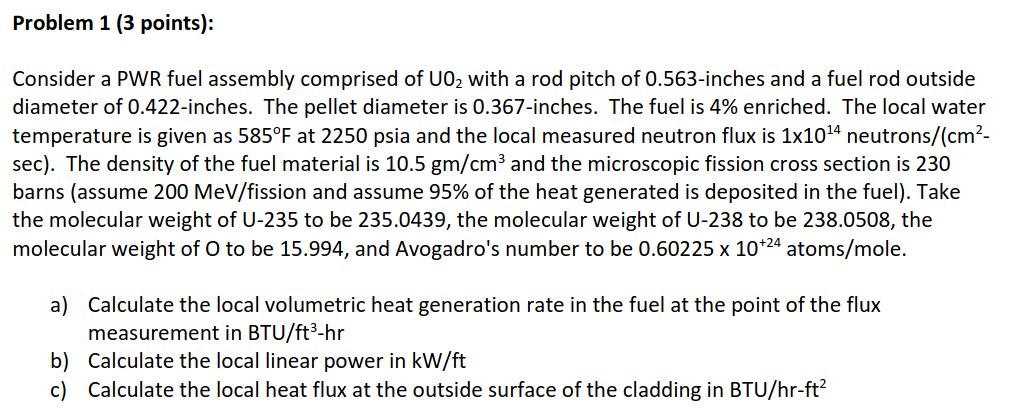

In [2]:
pitch = 0.563 #in
od = 0.422 #in
d_pellet = 0.367 #in
r = 0.04
t_water = 585 #f
p_water = 2250 #psia
phi = 1e14 #neutrons/cm/sec
rho_fm = 10.5 #g/cm^3
sigma_f = 230 #barns
m_u235 = 235.0439 #amu
m_u238 = 238.0508 #amu
m_o = 15.994 #amu
avo = 0.60225e24 #atoms/mol
Q_fission = 200*0.95 #MeV

## Part A

In [3]:
#First, find f (fuel mass fraction)
M_ff = m_u235
M_nf = m_u238
M_other = m_o

f = (r*M_ff+(1-r)*M_nf)/(r*M_ff+(1-r)*M_nf+M_other) 
print(f'The fuel mass fraction is {f:.3f}')

#Now, find the number density:
i = 1 #one uranium for every UO2
N_ff = avo/M_ff*(r*f*rho_fm)*i #atoms/cm^3
print(f'The fuel number density is {N_ff:.3e} atoms/cm^3')

#Now calculate volumetric heat rate (with unit conversions)
q_ppprime = (N_ff*2.54**3) * (sigma_f/6.452e+24) * (phi*2.54*60*60) * (Q_fission*1.51857e-16)
answer_print('1A',f'The local volumetric heat generation rate is {q_ppprime:.3e} BTU/ft^3-hr')

The fuel mass fraction is 0.937
The fuel number density is 1.008e+21 atoms/cm^3

=========FINAL ANSWER=========
1A:
The local volumetric heat generation rate is 1.554e+04 BTU/ft^3-hr
=========FINAL ANSWER=========



## Part B

In [4]:
#Calculate area of fuel pellet
A_pellet = (d_pellet/12)**2*np.pi/4 #ft^2
q_eng = q_ppprime * A_pellet #BTU/ft-hr
q = q_eng * 0.000293071 #kW/ft
answer_print('1B',f'The local linear power is {q:.3e} kW/ft')


=========FINAL ANSWER=========
1B:
The local linear power is 3.346e-03 kW/ft
=========FINAL ANSWER=========



## Part C

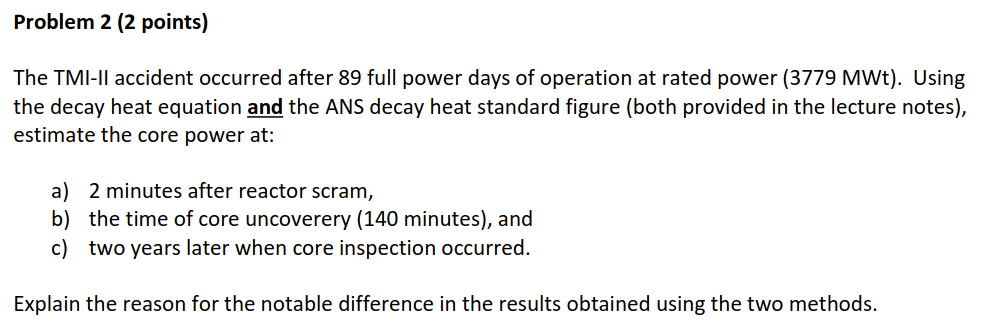

In [5]:
def decay_heat_ratio(t_shutdown, t_operation):
    return 0.066*(t_shutdown**(-0.2)-(t_operation+t_shutdown)**(-0.2))

## Part A

In [6]:
ratio_eq = decay_heat_ratio(2*60, 89*24*60*60)
ratio_ans = 0.04
power = 3779 #MW
answer_print('2A', f' The decay heat formula yields {ratio_eq*power:.3e} MW.\n The graph from the ANS indicates about {ratio_ans*power:.3e} MW.')


=========FINAL ANSWER=========
2A:
 The decay heat formula yields 8.527e+01 MW.
 The graph from the ANS indicates about 1.512e+02 MW.
=========FINAL ANSWER=========



## Part B

In [7]:
ratio_eq = decay_heat_ratio(140*60, 89*24*60*60)
ratio_ans = 0.009
power = 3779 #MW
answer_print('2A', f' The decay heat formula yields {ratio_eq*power:.3e} MW.\n The graph from the ANS indicates about {ratio_ans*power:.3e} MW.')


=========FINAL ANSWER=========
2A:
 The decay heat formula yields 3.047e+01 MW.
 The graph from the ANS indicates about 3.401e+01 MW.
=========FINAL ANSWER=========



## Part C

In [8]:
ratio_eq = decay_heat_ratio(2*365*24*60*60, 89*24*60*60)
ratio_ans = 2e-5 # Roughly... hard to estimate
power = 3779 #MW
answer_print('2A', f' The decay heat formula yields {ratio_eq*power:.3e} MW.\n The graph from the ANS indicates about {ratio_ans*power:.3e} MW.')


=========FINAL ANSWER=========
2A:
 The decay heat formula yields 1.563e-01 MW.
 The graph from the ANS indicates about 7.558e-02 MW.
=========FINAL ANSWER=========



**EXPLANATION**:

The ANS chart is experimental results and accounts for actinides effects on decay heat. The empirical estimate that is the curve fit is only that, an estimate. That being said, there may be some discrepancy in results here because the ANS chart can only be read so accurately. Some estimation of the power ratio has to happen that might not be perfect. 

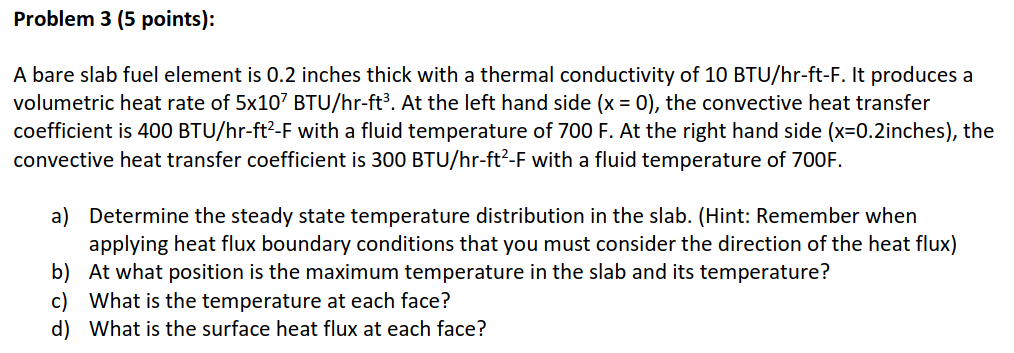

In [9]:
t = 0.2/12 #ft
k = 10 #BTU/hr/ft/F
q_ppprime = 5e7 #BTU/hr/ft^3
h_left = 400 #BTU/hr/ft^2/F
T_left = 700 #F
h_right = 300 #BTU/hr/ft^2/F
T_right = 700 #F
x_left = 0 #ft
x_right = 0.2/12 #ft

## Part A

$$ \rho c_p \frac{\partial T}{\partial t} = k \nabla^2 T + q''' $$

But because we're steady state $\frac{\partial T}{\partial t} = 0$:

$$ 0 = k \nabla^2 T + q''' $$

And because we're in one dimension...

$$ k \frac{d^2 T}{dx^2} + q''' = 0$$

Now we integrate:

$$ k\frac{dT}{dx} + q'''x + C_1 = 0 $$

$$ \frac{dT}{dx} = -\frac{ q'''x + C_1}{k} $$

and integrate again:

$$ T(x) = -(\frac{ q'''}{2k} x^2 + \frac{C_1}{k} x + C_2) $$


This gives us our governing equation. Now we need to solve for our boundary conditions. We do this first on the left side:
$$ -k\frac{dT}{dx}_{x=0} = h_\text{left} ( T_\text{left}- T(0))$$

$$ -k(-q''' \times 0 / k - C_1/k) = h_\text{left} (T_\text{left} - C_2)$$

$$ C_1 = h_\text{left} (T_\text{left} - C_2)$$

And now for our right side:

$$ -k\frac{dT}{dx}_{x=0.2/12 \text{[ft]}} = h_\text{right} (T_\text{right} - T(0.2/12)\text{[ft]}) $$

$$ -k \left(-\frac{q''' x_\text{right}+ C_1}{k}\right) = h_\text{right} (T_\text{right} + (\frac{ q'''}{2k} x_\text{right}^2 + \frac{C_1}{k} x_\text{right} + C_2)) $$

$$ q''' x_\text{right}+ C_1 = h_\text{right} (T_\text{right} + (\frac{ q'''}{2k} x_\text{right}^2 + \frac{C_1}{k} x_\text{right} + C_2)) $$

Now at this point I'm going to introduce SymPy to do the algebra heavy lifting. We can get away with this because I've organized all the units to be compatible when writing the code cell above:

In [10]:
C_1, C_2 = sm.symbols('C_1, C_2')

left_BC = sm.Eq(C_1, h_left*(T_left - C_2))
display('Left BC', left_BC)

right_BC = sm.Eq(q_ppprime*x_right + C_1, h_right*(T_right  + (q_ppprime*x_right**2/2/k + C_1/k*x_right + C_2)))
display('Right BC', right_BC)

'Left BC'

Eq(C_1, 280000 - 400*C_2)

'Right BC'

Eq(C_1 + 833333.333333333, 0.5*C_1 + 300*C_2 + 418333.333333333)

With two equations and two unknowns, we can solve for C_1 and C_2:

In [11]:
soln = sm.solve([left_BC, right_BC])
display(soln)

{C_1: -164000.000000000, C_2: 1110.00000000000}

And finally we plug these into our equation for T:

In [12]:
T = lambda x: (-q_ppprime*x**2/2 + soln[C_1]*x + soln[C_2])/k
T(0.2/12)

-856.777777777778

Just trying some stuff

## Part B

## Part C

In [13]:
answer_print('3C',f'At the left face: {T(x_left):.0f} F \nAt the right face:{T(x_right):.0f} F')


=========FINAL ANSWER=========
3C:
At the left face: 111 F 
At the right face:-857 F
=========FINAL ANSWER=========



## Part D